## CMPINF 2100 Week 11 | Working with LINEAR MODELS with INTERACTION Features

Let's read in the data we created in the PREVIOUS ADDITIVE features demonstration.

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

### Read Data

In [2]:
df = pd.read_csv('linear_additive_example.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      35 non-null     float64
 1   x2      35 non-null     float64
 2   trend   35 non-null     float64
 3   y       35 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


In [4]:
df.head()

,x1,x2,trend,y
0,1.024252,-0.650623,1.617167,1.547730
1,-1.733671,0.993904,-3.431878,-3.988479
2,-0.089294,0.251805,-0.373762,-0.107839
3,-1.093748,1.356543,-2.111500,-2.594083
4,0.320995,-0.145121,0.346917,-0.583119


### Fit linear model with INTERACTIONS

The formula interface has several STRANGE and WEIRD.. YET... quite useful syntax artifacts when working with INTERACTIONS.

In [5]:
fit_a = smf.ols(formula='y ~ x1 + x2 + x1 * x2', data=df).fit()

In [6]:
fit_a.params

Intercept   -0.107266
x1           1.748614
x2           0.174882
x1:x2        0.264916
dtype: float64

Let's use the FORMULA INTERFACES actual SYNTAX for the MULTIPLICATION or INTERACTIVE FEATURE.

In [7]:
fit_b = smf.ols(formula='y ~ x1 + x2 + x1:x2', data=df).fit()

In [8]:
fit_b.params

Intercept   -0.107266
x1           1.748614
x2           0.174882
x1:x2        0.264916
dtype: float64

In [10]:
fit_b.bse

Intercept    0.120003
x1           0.136364
x2           0.132036
x1:x2        0.129129
dtype: float64

In [11]:
fit_a.pvalues

Intercept    3.782866e-01
x1           6.215348e-14
x2           1.950164e-01
x1:x2        4.874308e-02
dtype: float64

In [12]:
fit_b.pvalues

Intercept    3.782866e-01
x1           6.215348e-14
x2           1.950164e-01
x1:x2        4.874308e-02
dtype: float64

The FORMULA interface creates a SHORTCUT to INCLUDE MAIN EFFECTS **AND** INTERACTION in the model!

The SHORT CUT is to use the `*` operator in the FORMULA interface!

In [13]:
fit_c = smf.ols(formula='y ~ x1 * x2', data=df).fit()

In [14]:
fit_c.params

Intercept   -0.107266
x1           1.748614
x2           0.174882
x1:x2        0.264916
dtype: float64

In [15]:
fit_b.bse

Intercept    0.120003
x1           0.136364
x2           0.132036
x1:x2        0.129129
dtype: float64

In [16]:
fit_c.bse

Intercept    0.120003
x1           0.136364
x2           0.132036
x1:x2        0.129129
dtype: float64

This means if we would ONLY want PRODUCTS then we should use the `:` operator in the FORMULA.

In [17]:
fit_d = smf.ols(formula='y ~ x1:x2', data=df).fit()

In [18]:
fit_d.params

Intercept    0.006942
x1:x2        0.939718
dtype: float64

There is ONE MORE way in representing the SHORT CUT and this related to WHY we need to use `np.power()` when we want to RAISE an input to a polynomial degree.

In [20]:
df.x1.head() ** 2

0    1.049092
1    3.005615
2    0.007973
3    1.196285
4    0.103038
Name: x1, dtype: float64

In [21]:
np.power( df.x1.head().to_numpy(), 2)

array([1.04909217, 3.00561521, 0.00797335, 1.19628455, 0.10303796])

In [22]:
fit_e = smf.ols(formula='y ~ x1 ** 2 + x2 ** 2', data=df).fit()

In [23]:
fit_e.params

Intercept   -0.109888
x1           1.879500
x2           0.075586
dtype: float64

In [25]:
fit_f = smf.ols(formula='y ~ x1 + x2', data=df).fit()

In [26]:
fit_f.params

Intercept   -0.109888
x1           1.879500
x2           0.075586
dtype: float64

In the FORMULA interface the `**` or POWER operator denotes the DEGREE of INTERACTION between the inputs!

You cannot use the `**` operator to RAISE an input to POWER!

In [27]:
fit_g = smf.ols(formula='y ~ np.power(x1,2) + np.power(x2, 2)', data=df).fit()

In [28]:
fit_g.params

Intercept          0.023664
np.power(x1, 2)    0.468992
np.power(x2, 2)   -0.573997
dtype: float64

In [29]:
fit_h = smf.ols(formula='y ~ x1 + np.power(x1,2) + x2 + np.power(x2,2)', data=df).fit()

In [30]:
fit_h.params

Intercept         -0.133105
x1                 1.844778
np.power(x1, 2)    0.085897
x2                 0.072746
np.power(x2, 2)   -0.058627
dtype: float64

A shortcut is that you can CREATE up to and INCLUDING ALL DEGREE OF INTERACTIONS using the `**` operator in the FORMULA interface!

In [31]:
fit_i = smf.ols(formula='y ~ (x1 + x2)**2', data=df).fit()

In [32]:
fit_i.params

Intercept   -0.107266
x1           1.748614
x2           0.174882
x1:x2        0.264916
dtype: float64

You can use this notation to create very COMPLEX interaction between many different types of FEATURES!

Thus, you can even INTERACT non-linear features togehter!

In [34]:
fit_j = smf.ols(formula='y ~ (x1 + np.power(x1,2) + x2 + np.power(x2,2))**2', data=df).fit()

In [35]:
fit_j.params

Intercept                          0.143433
x1                                 1.043322
np.power(x1, 2)                   -0.363776
x2                                 0.044654
np.power(x2, 2)                   -0.219340
x1:np.power(x1, 2)                 0.230775
x1:x2                             -0.214390
x1:np.power(x2, 2)                 0.484325
np.power(x1, 2):x2                -0.154070
np.power(x1, 2):np.power(x2, 2)    0.482368
x2:np.power(x2, 2)                -0.063944
dtype: float64

When you want to INTERACT polynomials... I like to seperate the POLYNOMIALS derrived from each input using `()` in the formula interface!

In [36]:
fit_k = smf.ols(formula='y ~ (x1 + np.power(x1,2)) * (x2 + np.power(x2,2))', data=df).fit()

In [37]:
fit_k.params

Intercept                          0.048390
x1                                 1.355946
np.power(x1, 2)                   -0.287992
x2                                -0.030340
np.power(x2, 2)                   -0.061388
x1:x2                             -0.229695
x1:np.power(x2, 2)                 0.641887
np.power(x1, 2):x2                -0.229303
np.power(x1, 2):np.power(x2, 2)    0.458874
dtype: float64

### Make Predictions

You do NOT need to create the interaction features yourself!

You ONLY need to define the INPUTS and the model object will generate all necessary features for you... beause the FORMULA INTERFACE **REMEMBERS** what to do!

We learned how to create a GRID of combinations of the INPUTS!

In [38]:
input_grid = pd.DataFrame([ (x1, x2) for x1 in np.linspace(df.x1.min(), df.x1.max(), num=101)
                                     for x2 in np.linspace(df.x2.min(), df.x2.max(), num=9)],
                          columns=['x1', 'x2'])

In [39]:
input_grid

,x1,x2
0,-1.733671,-1.813330
1,-1.733671,-1.269344
2,-1.733671,-0.725357
3,-1.733671,-0.181371
4,-1.733671,0.362615
...,...,...
904,1.822354,0.362615
905,1.822354,0.906601
906,1.822354,1.450587
907,1.822354,1.994573


In [40]:
input_grid.nunique()

x1    101
x2      9
dtype: int64

In [41]:
viz_grid = input_grid.copy()

PREDICT the AVERAGE OUTPUT or TREND using the last model we fit.

In [42]:
viz_grid['pred'] = fit_k.predict( input_grid )

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


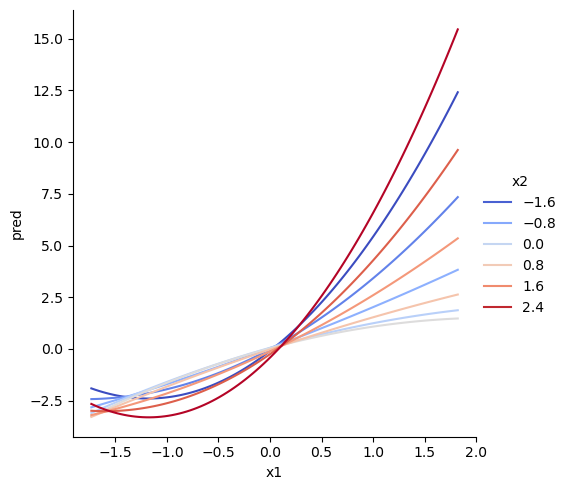

In [43]:
sns.relplot(data = viz_grid,
            x='x1', y='pred', kind='line',
            hue='x2', palette='coolwarm',
            estimator=None, units='x2')

plt.show()